# Project: Breast Cancer Classification
Data Source: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
## 1. Exploratory Data Analysis
### 1.1 Initial Investigations on raw data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [3]:
# read data
df = pd.read_csv("data.csv")
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# examine the statistics of each columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [5]:
# check the null value and datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# drop column 0 and 32, id and Unnamed: 32 irrelevant for classification
df.drop(columns=['id','Unnamed: 32'], inplace = True)

From the analysis above, there is no missing value in the dataset
### 1.2 Multicollinearity Analysis

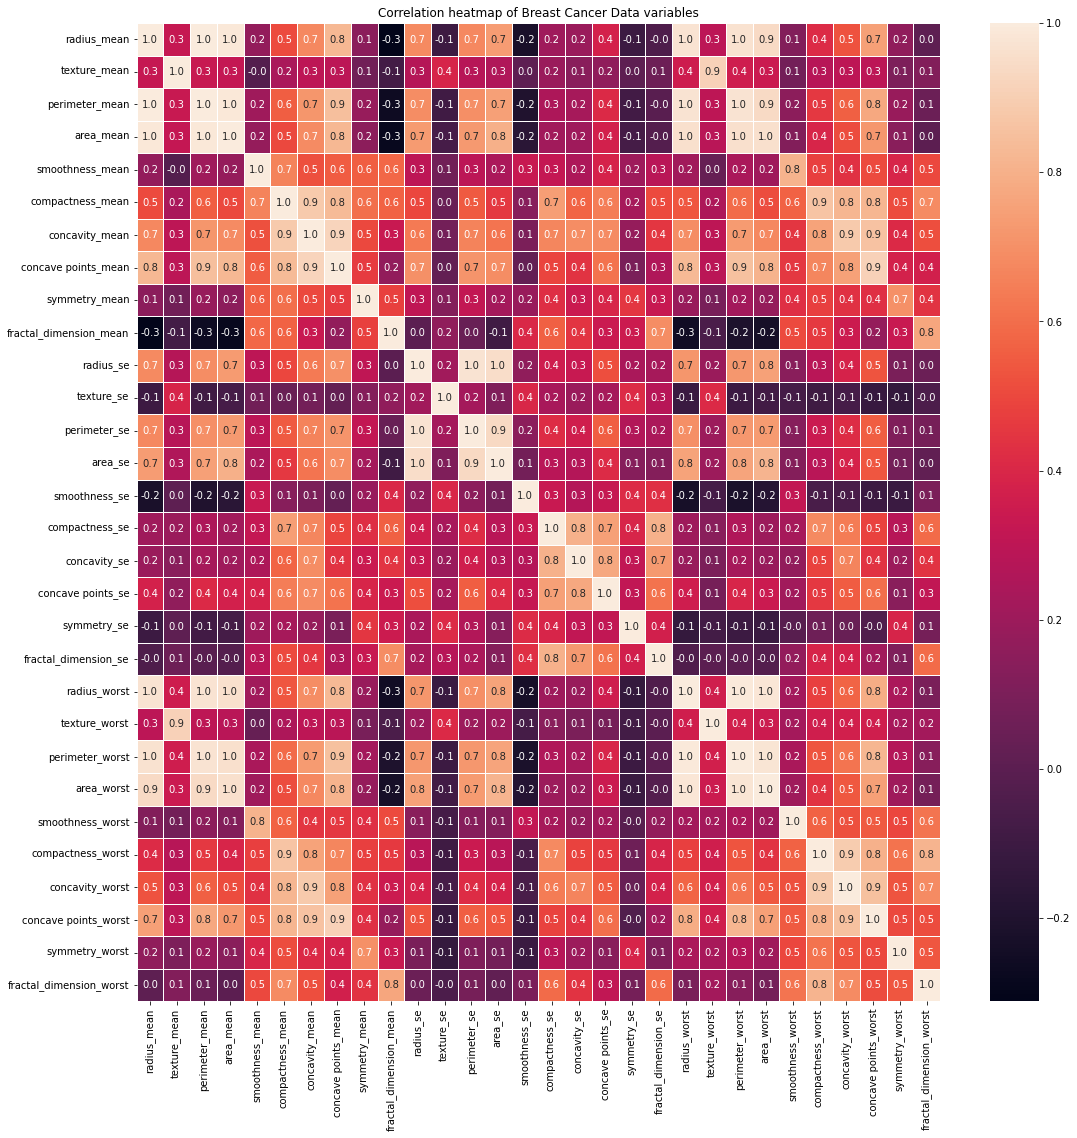

In [7]:
# heatmap for all dataset variables
corr_df = df.corr()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr_df, annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('Correlation heatmap of Breast Cancer Data variables');

In [8]:
# devided data into three groups:"mean","standard error", and "worst"
# group 1: mean
group_mean=[]
for i in df.columns.tolist():
    if re.search("_mean$", i):
        group_mean.append(i)
df_mean = df[group_mean]  

# group 2: standard error
group_se=[]
for i in df.columns.tolist():
    if re.search("_se$", i):
        group_se.append(i)
df_se = df[group_se] 

# group 3: worst
group_worst=[]
for i in df.columns.tolist():
    if re.search("_worst$", i):
        group_worst.append(i)
df_worst = df[group_worst] 

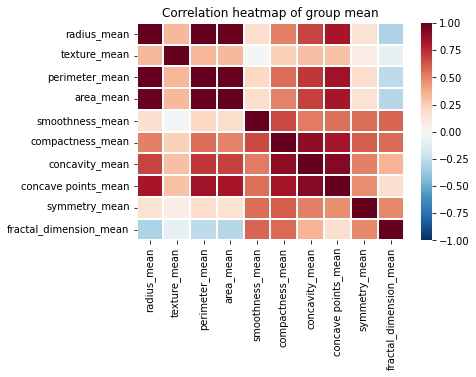

In [9]:
# heatmap for dataset variables for group 1: mean
corr_df_mean = df_mean.corr()
sns.heatmap(corr_df_mean, vmin=-1, vmax=1, cmap="RdBu_r", lw=.05)
plt.title('Correlation heatmap of group mean');

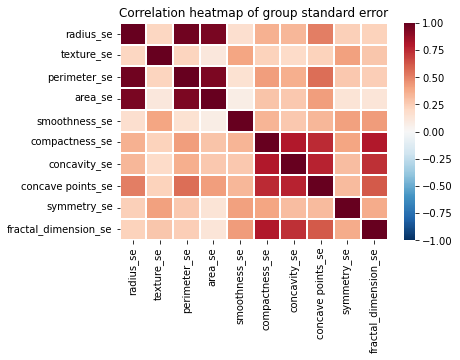

In [10]:
# heatmap for dataset variables for group 2: standard error
corr_df_se = df_se.corr()
sns.heatmap(corr_df_se, vmin=-1, vmax=1, cmap="RdBu_r", lw=.05)
plt.title('Correlation heatmap of group standard error');

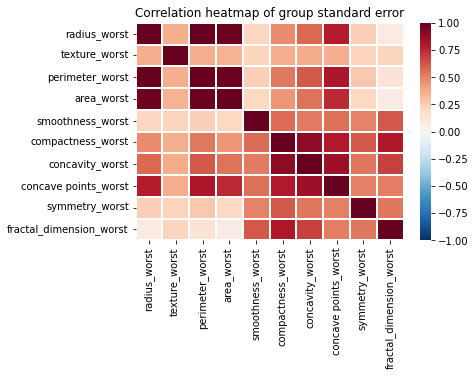

In [11]:
# heatmap for dataset variables for group 2: worst
corr_df_worst = df_worst.corr()
sns.heatmap(corr_df_worst, vmin=-1, vmax=1, cmap="RdBu_r", lw=.05)
plt.title('Correlation heatmap of group standard error');

In the Multicollinearity Analysis    
    - perimeter and area are highly correlated because of the calculation. But the difference bettwen perimeter and area might contain the shape information: for example, the area/perimeter ratio is the largest when the shape is round, and tend to be smaller when the share is irregullar. So use area/perimeter ratio instead of perimeter
    - Group mean and Group worst are highly correlated, but worst value can provided information of outlier.   
    
## 2. Data Pre-processing
### 2.1 features and responses

In [12]:
df['area/peri_mean'] = df['area_mean'] / df['perimeter_mean']
df['area/peri_se'] = df['area_se'] / df['perimeter_se']
df['area/peri_worst'] = df['area_worst'] / df['perimeter_worst']

In [13]:
# drop perimeter columns
df.drop(columns=['perimeter_mean','perimeter_se','perimeter_worst'], inplace = True)

In [14]:
# response for the dataset
df_diagnosis = df['diagnosis']
df_diagnosis.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [15]:
# features for classification
X = df[df.columns[1:]]
X.head()

,radius_mean,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,area/peri_mean,area/peri_se,area/peri_worst
0,17.99,10.38,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,8.151466,17.860054,10.937161
1,20.57,17.77,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,9.977427,21.801059,12.317380
2,19.69,21.25,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,9.253846,20.508179,11.206557
3,11.42,20.38,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,4.976798,7.904209,5.741883
4,20.29,14.34,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,9.600296,17.366679,10.348226


In [16]:
# for "diagnosis": replcae M with 1 and B with 0 for classification (M = malignant, B = benign)
y = df_diagnosis.copy()
for i in range(len(df_diagnosis)):
    if df_diagnosis[i] == "M":
        y.iloc[i] =1
    elif df_diagnosis[i] == "B":
        y.iloc[i] =0
y = y.to_numpy().astype('int')

### 2.2 Data scaling

In [17]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

### 2.3 Train test split

In [18]:
# split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3 hyperparameter tuning - 5 models

### 3.1 Decision Tree with pruning
#### 3.1.1 max_depth of decision tree

In [19]:
# Examine the max_depth in vanilla decision tree classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
print(model_dt.get_depth())
print(model_dt.get_n_leaves())

7
15


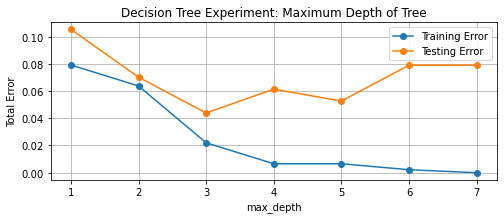

In [21]:
max_depth_list = np.arange(1,8)

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in max_depth_list:
    dtc = DecisionTreeClassifier(max_depth=x) 
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))

x = max_depth_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.plot(x, train_errors, 'o-',label='Training Error') # Plot training error over domain
plt.plot(x, test_errors, 'o-',label='Testing Error') # Plot testing error over domain
plt.xlabel('max_depth') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend(loc='best') # Show plot labels as legend
plt.title('Decision Tree Experiment: Maximum Depth of Tree')
plt.savefig('BCD_DT_max_depth.png')
plt.show() # Show graph

#### 3.1.2 min_samples_leaf of decision tree

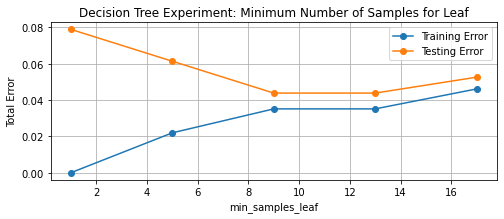

In [22]:
min_samples_leaf_list = np.arange(1,21,4)

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in min_samples_leaf_list:
    dtc = DecisionTreeClassifier(min_samples_leaf=x) 
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))

x = min_samples_leaf_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.plot(x, train_errors,'o-', label='Training Error') # Plot training error over domain
plt.plot(x, test_errors,'o-', label='Testing Error') # Plot testing error over domain
plt.xlabel('min_samples_leaf') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend(loc='best') # Show plot labels as legend
plt.title('Decision Tree Experiment: Minimum Number of Samples for Leaf')
plt.savefig('BCD_DT_min_samples_leaf.png')
plt.show() # Show graph

#### 3.1.3 ccp_alpha (Minimal Cost-Complexity Pruning)

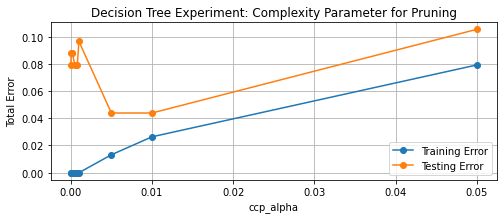

In [23]:
ccp_alpha_list = [0.00001,0.00005,0.0001,0.0002,0.0005,0.0008,0.001,0.005,0.01,0.05]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in ccp_alpha_list:
    dtc = DecisionTreeClassifier(ccp_alpha=x) 
    dtc.fit(X_train,y_train)
    train_z = dtc.predict(X_train)
    test_z = dtc.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))

x = ccp_alpha_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.plot(x, train_errors,'o-', label='Training Error') # Plot training error over domain
plt.plot(x, test_errors,'o-', label='Testing Error') # Plot testing error over domain
plt.xlabel('ccp_alpha') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend(loc='best') # Show plot labels as legend
plt.title('Decision Tree Experiment: Complexity Parameter for Pruning')
plt.savefig("BCD_DT_ccp_alpha.png")
plt.show() # Show graph

#### 3.1.4 Best Decision Tree

In [26]:
# Hyperparameter tuning for Decision Tree 
# define classifier
model = DecisionTreeClassifier()

# Define a hyper-parameter space to search
parameters = {'max_depth': np.arange(2,8), 'min_samples_leaf': np.arange(1,21,4), 'ccp_alpha' : [0.00001,0.00005,0.0001,0.0002,0.0005,0.0008,0.001,0.005,0.01,0.05]}

clf = GridSearchCV(model, parameters, cv=5, scoring='f1',n_jobs=-1)
clf.fit(X_train, y_train)
# best_max_depth = clf.best_params_['max_depth']
# best_min_samples_leaf = clf.best_params_['min_samples_leaf']

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [1e-05, 5e-05, 0.0001, 0.0002, 0.0005,
                                       0.0008, 0.001, 0.005, 0.01, 0.05],
                         'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 1,  5,  9, 13, 17])},
             scoring='f1')

In [27]:
clf.best_params_

{'ccp_alpha': 0.005, 'max_depth': 7, 'min_samples_leaf': 1}

In [28]:
print(clf.score(X_train, y_train))

0.9821428571428571


In [49]:
# y_pred_train_b = tree_best.predict(X_train)
# y_pred_b = tree_best.predict(X_test)

In [50]:
# print('in-sample rmse:', mean_squared_error(y_train, y_pred_train_b, squared=False))
# print('out-sample rmse:', mean_squared_error(y_test, y_pred_b, squared=False))
# print('Training accuracy:', round(tree_best.score(X_train, y_train),3))
# print('Validation accuracy:', round(tree_best.score(X_test, y_test),3))

in-sample rmse: 0.08119979429411502
out-sample rmse: 0.26490647141300877
Training accuracy: 0.993
Validation accuracy: 0.93


### 3.2 Neural networks
#### 3.2.1 learning_rate_init

C:\Users\anluz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\anluz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\anluz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


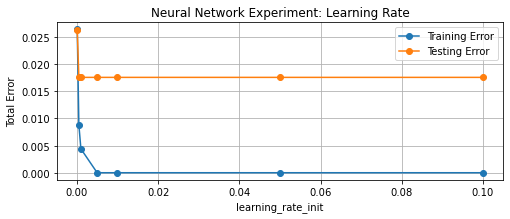

In [24]:
learning_rate_init_list = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in learning_rate_init_list:
    mlp = MLPClassifier(learning_rate_init=x) 
    mlp.fit(X_train,y_train)
    train_z = mlp.predict(X_train)
    test_z = mlp.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))

x = learning_rate_init_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.plot(x, train_errors, 'o-',label='Training Error') # Plot training error over domain
plt.plot(x, test_errors,'o-', label='Testing Error') # Plot testing error over domain
plt.xlabel('learning_rate_init') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend(loc='best') # Show plot labels as legend
plt.title('Neural Network Experiment: Learning Rate')
plt.savefig('BCD_NN_learning_rate.png')
plt.show() # Show graph

### 3.2.2 activation

C:\Users\anluz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\anluz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


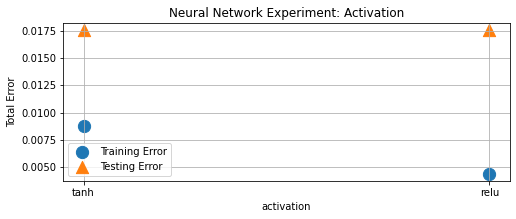

In [25]:
activation_list = ['tanh', 'relu']

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in activation_list:
    mlp = MLPClassifier(activation =x) 
    mlp.fit(X_train,y_train)
    train_z = mlp.predict(X_train)
    test_z = mlp.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))
    
x = activation_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.scatter(x, train_errors,  marker='o', s=150, label='Training Error') # Plot training error over domain
plt.scatter(x, test_errors,  marker='^', s=150, label='Testing Error') # Plot testing error over domain
plt.xlabel('activation') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend(loc='best') # Show plot labels as legend
plt.title('Neural Network Experiment: Activation')
plt.savefig('BCD_NN_activation.png')
plt.show() # Show graph

#### 3.2.3 Best MLP Classifier

In [31]:
# define classifier
mlp = MLPClassifier(max_iter=100)

# Define a hyper-parameter to search
parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# find best MLP Classifier
clf = GridSearchCV(mlp, parameters, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)


C:\Users\anluz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [32]:
# print best model's prameter
print(clf.best_params_)

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [33]:
print(clf.score(X_train, y_train))

0.9934065934065934


In [84]:
# mlp_best = MLPClassifier(max_iter=100, activation= 'relu', alpha= 0.0001, hidden_layer_sizes= (50, 50, 50), learning_rate = 'constant', solver = 'adam' )

In [85]:
# mlp_best.fit(X_train, y_train)

C:\Users\anluz\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=100)

In [86]:
# y_pred_train_mlp = mlp_best.predict(X_train)
# y_pred_mlp = mlp_best.predict(X_test)

# print('in-sample rmse:', mean_squared_error(y_train, y_pred_train_mlp, squared=False))
# print('out-sample rmse:', mean_squared_error(y_test, y_pred_mlp, squared=False))
# print('Training accuracy:', round(mlp_best.score(X_train, y_train),3))
# print('Validation accuracy:', round(mlp_best.score(X_test, y_test),3))

in-sample rmse: 0.0
out-sample rmse: 0.13245323570650439
Training accuracy: 1.0
Validation accuracy: 0.982


### 3.3 Boosting

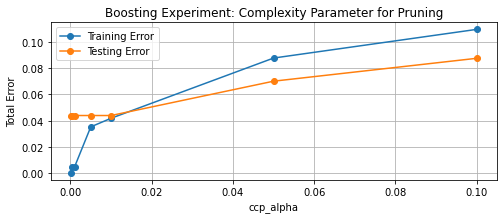

In [26]:
ccp_alpha_list =[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in ccp_alpha_list:
    bc = GradientBoostingClassifier(ccp_alpha=x) 
    bc.fit(X_train,y_train)
    train_z = bc.predict(X_train)
    test_z = bc.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))

x = ccp_alpha_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.plot(x, train_errors, 'o-',label='Training Error') # Plot training error over domain
plt.plot(x, test_errors, 'o-',label='Testing Error') # Plot testing error over domain
plt.xlabel('ccp_alpha') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend(loc='best') # Show plot labels as legend
plt.title('Boosting Experiment: Complexity Parameter for Pruning')
plt.savefig('BCD_BST_ccp_alpha.png')
plt.show() # Show graph

#### 3.3.2 Learning rate

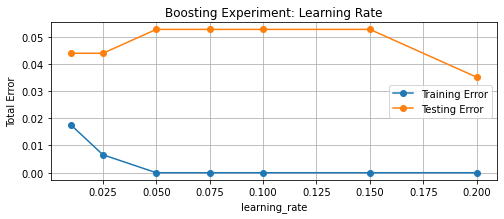

In [27]:
learning_rate_list = [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in learning_rate_list:
    bc = GradientBoostingClassifier(learning_rate=x) 
    bc.fit(X_train,y_train)
    train_z = bc.predict(X_train)
    test_z = bc.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))

x = learning_rate_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.plot(x, train_errors, 'o-',label='Training Error') # Plot training error over domain
plt.plot(x, test_errors, 'o-',label='Testing Error') # Plot testing error over domain
plt.xlabel('learning_rate') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend(loc='best') # Show plot labels as legend
plt.title('Boosting Experiment: Learning Rate')
plt.savefig('BCD_BST_learning_rate.png')
plt.show() # Show graph

#### 3.3.3 best boosting

In [36]:
# define classifier
boost=GradientBoostingClassifier()

# Define a hyper-parameter to search
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

# find best Classifier
clf = GridSearchCV(boost, parameters, cv=5, n_jobs=-1)

clf.fit(X_train, y_train)
print(clf.best_params_)

{'learning_rate': 0.15, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 10, 'subsample': 0.5}


In [37]:
print(clf.score(X_train, y_train))

0.9934065934065934


In [90]:
# boost_best=GradientBoostingClassifier(learning_rate= 0.2, loss= 'deviance', max_depth= 8, max_features='log2', min_samples_leaf= 1, n_estimators= 10, subsample= 1.0)
# boost_best.fit(X_train, y_train)

GradientBoostingClassifier()

In [91]:
# y_pred_train_boost = boost_best.predict(X_train)
# y_pred_boost = boost_best.predict(X_test)

# print('in-sample rmse:', mean_squared_error(y_train, y_pred_train_boost, squared=False))
# print('out-sample rmse:', mean_squared_error(y_test, y_pred_boost, squared=False))
# print('Training accuracy:', round(boost_best.score(X_train, y_train),3))
# print('Validation accuracy:', round(boost_best.score(X_test, y_test),3))

in-sample rmse: 0.0
out-sample rmse: 0.22941573387056177
Training accuracy: 1.0
Validation accuracy: 0.947


### 3.4 Support Vector Machines

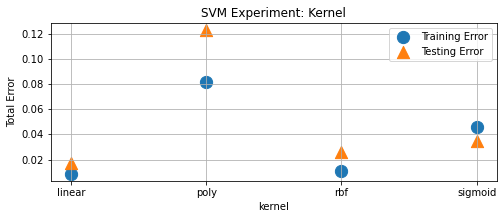

In [28]:
kernel_list = ['linear','poly' , 'rbf', 'sigmoid']

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in kernel_list:
    svm = SVC(kernel=x) 
    svm.fit(X_train,y_train)
    train_z = svm.predict(X_train)
    test_z = svm.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))
    
x = kernel_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.scatter(x, train_errors,  marker='o', s=150, label='Training Error') # Plot training error over domain
plt.scatter(x, test_errors,  marker='^', s=150, label='Testing Error') # Plot testing error over domain
plt.xlabel('kernel') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('SVM Experiment: Kernel')
plt.savefig('BCD_SVM_kernel.png')
plt.show() # Show graph

#### 3.4.2 Regularization parameter C

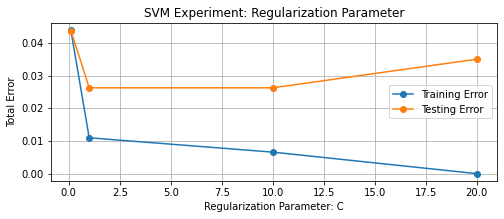

In [29]:
C_list = [0.1,1, 10, 20]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in C_list:
    svm = SVC(C=x) 
    svm.fit(X_train,y_train)
    train_z = svm.predict(X_train)
    test_z = svm.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))

x = C_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.plot(x, train_errors, 'o-', label='Training Error') # Plot training error over domain
plt.plot(x, test_errors, 'o-',label='Testing Error') # Plot testing error over domain
plt.xlabel('Regularization Parameter: C') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('SVM Experiment: Regularization Parameter')
plt.savefig('BCD_SVM_C.png')
plt.show() # Show graph

#### 3.4.2 best SVM

In [40]:
# define classifier
svm = SVC()

# Define a hyper-parameter to search
parameters = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

# find best Classifier
clf = GridSearchCV(svm, parameters, cv=5, n_jobs=-1)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [41]:
print(clf.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [42]:
print(clf.score(X_train, y_train))

0.989010989010989


In [101]:
# svm_best = SVC(C=100, gamma=0.001,kernel= 'rbf')
# svm_best.fit(X_train, y_train)

SVC(C=100, gamma=0.001)

In [102]:
# y_pred_train_svm = svm_best.predict(X_train)
# y_pred_svm = svm_best.predict(X_test)

# print('in-sample rmse:', mean_squared_error(y_train, y_pred_train_svm, squared=False))
# print('out-sample rmse:', mean_squared_error(y_test, y_pred_svm, squared=False))
# print('Training accuracy:', round(svm_best.score(X_train, y_train),3))
# print('Validation accuracy:', round(svm_best.score(X_test, y_test),3))

in-sample rmse: 0.10482848367219183
out-sample rmse: 0.16222142113076254
Training accuracy: 0.989
Validation accuracy: 0.974


### 3.5 k-nearest neighbors
#### 3.5.1 n_neighbors

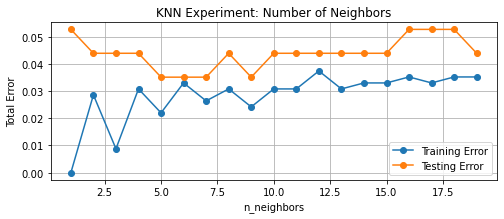

In [30]:
n_neighbors_list = np.arange(1,20)

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

for x in n_neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=x) 
    knn.fit(X_train,y_train)
    train_z = knn.predict(X_train)
    test_z = knn.predict(X_test)
    train_errors.append(mean_squared_error(y_train, train_z))
    test_errors.append(mean_squared_error(y_test, test_z))

x = n_neighbors_list # Create domain for plot
plt.figure(figsize=(8,3))
plt.gcf().subplots_adjust(bottom=0.15)
plt.grid()
plt.plot(x, train_errors, 'o-',label='Training Error') # Plot training error over domain
plt.plot(x, test_errors,'o-', label='Testing Error') # Plot testing error over domain
plt.xlabel('n_neighbors') # Label x-axis
plt.ylabel('Total Error') # Label y-axis
plt.legend() # Show plot labels as legend
plt.title('KNN Experiment: Number of Neighbors')
plt.savefig('BCD_KNN_n_neighbors.png')
plt.show() # Show graph

#### 3.5.2 Best KNN

In [44]:
# define classifier
knn = KNeighborsClassifier()

# Define a hyper-parameter to search
parameters = {'n_neighbors':np.arange(1,20), 'metric':['euclidean', 'manhattan']}

# find best Classifier
clf = GridSearchCV(knn, parameters, cv=5, n_jobs=-1)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [45]:
print(clf.best_params_)

{'metric': 'euclidean', 'n_neighbors': 5}


In [46]:
print(clf.score(X_train, y_train))

0.978021978021978


In [105]:
# knn_best = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
# knn_best.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [106]:
# y_pred_train_knn = knn_best.predict(X_train)
# y_pred_knn = knn_best.predict(X_test)

# print('in-sample rmse:', mean_squared_error(y_train, y_pred_train_knn, squared=False))
# print('out-sample rmse:', mean_squared_error(y_test, y_pred_knn, squared=False))
# print('Training accuracy:', round(knn_best.score(X_train, y_train),3))
# print('Validation accuracy:', round(knn_best.score(X_test, y_test),3))

in-sample rmse: 0.14824986333222023
out-sample rmse: 0.1873171623163388
Training accuracy: 0.978
Validation accuracy: 0.965


## 4. Best Models Learning Curve

In [32]:
def plot_learning_curve(estimator,title,X,y,axes=None,ylim=None,cv=None,n_jobs=None,scoring=None,train_sizes=np.linspace(0.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
#     axes[0].set_xlabel("Training size")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(estimator,X,y,scoring=scoring,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes,return_times=True,)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    score_times_mean = np.mean(score_times, axis=1)
    score_times_std = np.std(score_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Validation"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training size")
    axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability")

    # Plot fit_time vs score
#     fit_time_argsort = fit_times_mean.argsort()
#     fit_time_sorted = fit_times_mean[fit_time_argsort]
#     test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
#     test_scores_std_sorted = test_scores_std[fit_time_argsort]
#     axes[1].grid()
#     axes[1].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
#     axes[1].fill_between(
#         fit_time_sorted,
#         test_scores_mean_sorted - test_scores_std_sorted,
#         test_scores_mean_sorted + test_scores_std_sorted,
#         alpha=0.1,
#     )
#     axes[1].set_xlabel("fit_times")
#     axes[1].set_ylabel("Score")
#     axes[1].set_title("Performance of the model")

    # Plot n_samples vs score_times
#     axes[2].grid()
#     axes[2].plot(train_sizes, score_times_mean, "o-")
#     axes[2].fill_between(
#         train_sizes,
#         score_times_mean - score_times_std,
#         score_times_mean + score_times_std,
#         alpha=0.1,
#     )
#     axes[2].set_xlabel("Training size")
#     axes[2].set_ylabel("score_times")

    return plt


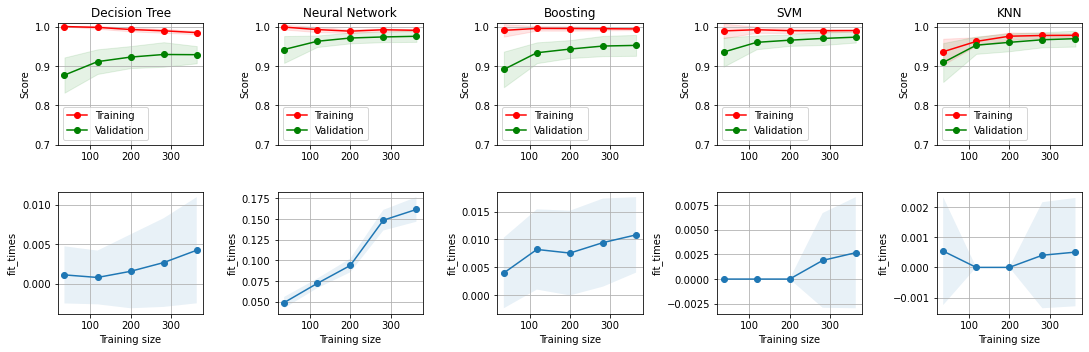

In [33]:
fig, axes = plt.subplots(2, 5, figsize=(15,5))
fig.tight_layout(h_pad=3, w_pad=4)
plt.gcf().subplots_adjust(bottom=0.15)

title = "Decision Tree"
# Cross validation with 20 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier( max_depth= 4, min_samples_leaf = 1, ccp_alpha= 0.005)
plot_learning_curve(
    estimator,
    title,
    X_train,
    y_train,
    axes=axes[:, 0],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)


title = "Neural Network"
# Cross validation with 20 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
estimator = MLPClassifier(max_iter=100, activation= 'relu',alpha= 0.05, hidden_layer_sizes= (100,), learning_rate = 'adaptive', solver = 'adam' )
plot_learning_curve(
    estimator,
    title,
    X_train,
    y_train,
    axes=axes[:, 1],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

title = "Boosting"
# Cross validation with 20 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
estimator = GradientBoostingClassifier(learning_rate = 0.15, loss= 'deviance', max_depth = 5, max_features= 'sqrt', n_estimators=10, subsample= 0.5)
plot_learning_curve(
    estimator,
    title,
    X_train,
    y_train,
    axes=axes[:, 2],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

title = "SVM"
# Cross validation with 20 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
estimator = SVC(C=100, gamma=0.001,kernel= 'rbf')
plot_learning_curve(
    estimator,
    title,
    X_train,
    y_train,
    axes=axes[:, 3],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

title = "KNN"
# Cross validation with 20 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=20, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
plot_learning_curve(
    estimator,
    title,
    X_train,
    y_train,
    axes=axes[:, 4],
    ylim=(0.7, 1.01),
    cv=cv,
    n_jobs=4,
    scoring="accuracy",
)

plt.savefig('BCD_best_models.png')
plt.show()